# Visualize Linear Discriminant Analysis
- apply it to a simple toy example
- show how it achieves better results than a naive approach
- visualize its limitations with another small toy example

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import scipy

## Generate synthetic dataset
- two independent classes
- each multivariate gaussians (iid samples)

In [3]:
mu1 = np.array([4, 5])
n1 = 100

mu2 = np.array([0, 1])
n2 = 200

sigma = scipy.linalg.sqrtm(np.array([[10, 0], [0, 1]]))

cluster1 = mu1 + np.random.randn(n1, 2) @ sigma
cluster2 = mu2 + np.random.randn(n2, 2) @ sigma
X = np.concatenate([cluster1, cluster2], axis=0)

mean1 = cluster1.mean(0)
mean2 = cluster2.mean(0)

mean_data = X.mean(0)
cov_data = np.cov((X - mean_data).T)

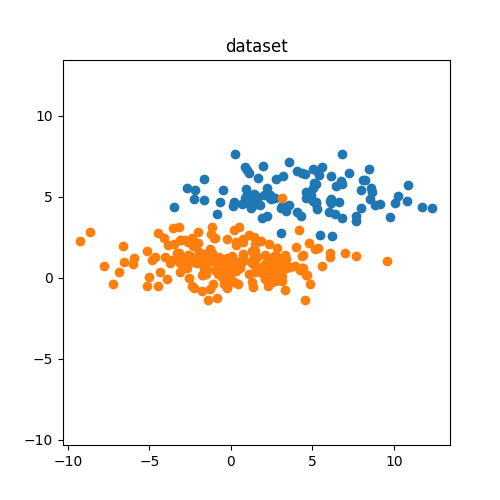

In [4]:
plt.figure(figsize=(5, 5))

plt.scatter(cluster1[:, 0], cluster1[:, 1])
plt.scatter(cluster2[:, 0], cluster2[:, 1])

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

fmin = min(xmin, ymin)
fmax = max(xmax, ymax)

plt.xlim(fmin, fmax)
plt.ylim(fmin, fmax)

plt.title("dataset")

plt.show()

## Compute naive solution
- find the center of mass for both classes
- create the line connecting these centers
- find the line (hyperplane) perpendicular through it

In [5]:
w = mean2 - mean1
w_perp = np.array([w[1], -w[0]])

center = mean1 + 0.5*w

Y = X @ w.T

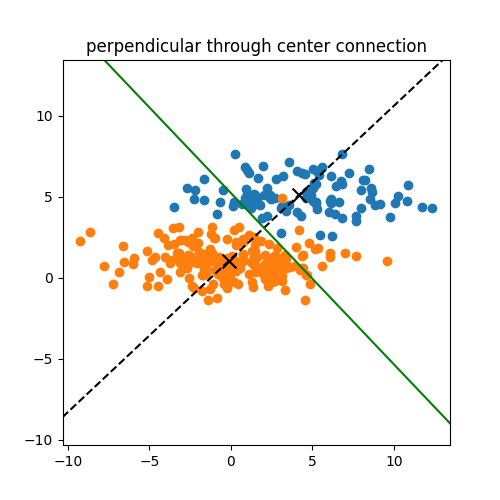

In [6]:
plt.figure(figsize=(5, 5))

plt.scatter(cluster1[:, 0], cluster1[:, 1])
plt.scatter(mean1[0], mean1[1], c='black', s=100, marker='x')
plt.scatter(cluster2[:, 0], cluster2[:, 1])
plt.scatter(mean2[0], mean2[1], c='black', s=100, marker='x')
#plt.scatter(mean_data[0], mean_data[1], c='black', s=200, marker='x')

plt.axline(mean1, mean2, color='black', linestyle='--')
plt.axline(center, center + w_perp, color='green')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

fmin = min(xmin, ymin)
fmax = max(xmax, ymax)

plt.xlim(fmin, fmax)
plt.ylim(fmin, fmax)

plt.title("perpendicular through center connection")

plt.show()

The discriminant is obviously not optimal. For further illustration we provide the histogram of the data projected onto this discriminant.

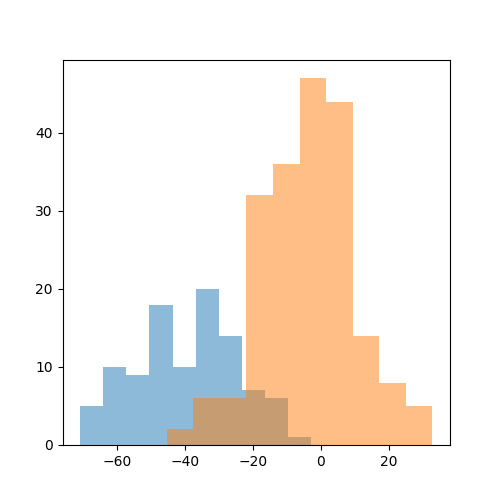

In [7]:
plt.figure(figsize=(5, 5))
plt.hist(Y[:n1], alpha=0.5)
plt.hist(Y[n1:], alpha=0.5)
plt.show()

## Compute the LDA solution
- decorrelate the combined data
- find center of mass of decorrelated classes
- create the line connecting these centers
- find the line (hyperplane) perpendicular through it

In [8]:
X_decorrelated = (X - mean_data) @ scipy.linalg.sqrtm(scipy.linalg.solve(cov_data, np.eye(2)))
mean1_decorrelated = X_decorrelated[:n1].mean(0)
mean2_decorrelated = X_decorrelated[n1:].mean(0)

In [9]:
w_lda = mean2_decorrelated - mean1_decorrelated
w_lda_perp = np.array([w_lda[1], -w_lda[0]])

center_lda = mean1_decorrelated + 0.5 * w_lda

Y_lda = X_decorrelated @ w_lda.T

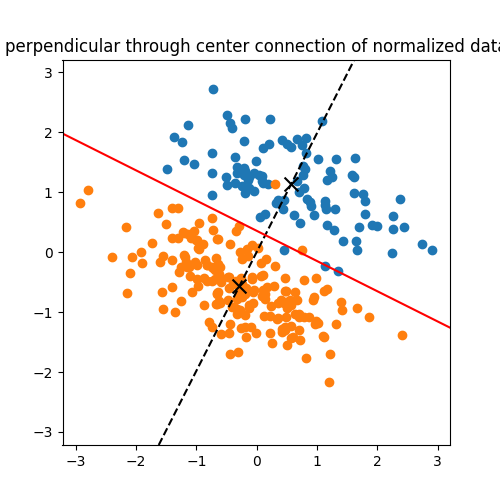

In [10]:
plt.figure(figsize=(5, 5))

plt.scatter(X_decorrelated[:n1, 0], X_decorrelated[:n1, 1])
plt.scatter(mean1_decorrelated[0], mean1_decorrelated[1], c='black', s=100, marker='x')
plt.scatter(X_decorrelated[n1:, 0], X_decorrelated[n1:, 1])
plt.scatter(mean2_decorrelated[0], mean2_decorrelated[1], c='black', s=100, marker='x')
#plt.scatter(0, 0, c='black', s=200, marker='x')

plt.axline(mean1_decorrelated, mean2_decorrelated, color='black', linestyle='--')
plt.axline(center_lda, center_lda + w_lda_perp, color='red')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

fmin = min(xmin, ymin)
fmax = max(xmax, ymax)

plt.xlim(fmin, fmax)
plt.ylim(fmin, fmax)

plt.title("perpendicular through center connection of normalized data")

plt.show()

This discriminant seems to be almost perfect, it is in fact optimal. Again, we provide the histogram of the data projected onto this discriminant.

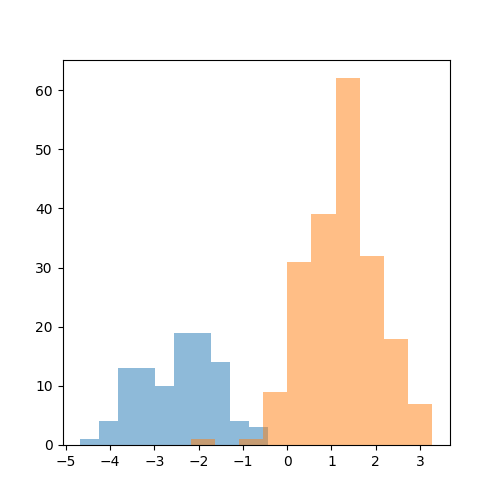

In [11]:
plt.figure(figsize=(5, 5))
plt.hist(Y_lda[:n1], alpha=0.5)
plt.hist(Y_lda[n1:], alpha=0.5)
plt.show()

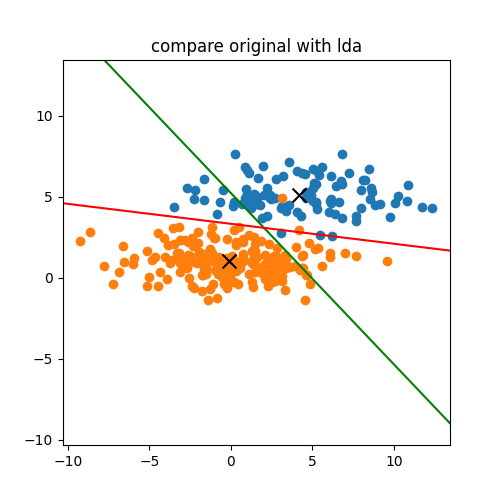

In [12]:
plt.figure(figsize=(5, 5))

plt.scatter(cluster1[:, 0], cluster1[:, 1])
plt.scatter(mean1[0], mean1[1], c='black', s=100, marker='x')
plt.scatter(cluster2[:, 0], cluster2[:, 1])
plt.scatter(mean2[0], mean2[1], c='black', s=100, marker='x')
#plt.scatter(mean_data[0], mean_data[1], c='black', s=200, marker='x')

plt.axline(center, center + w_perp, color='green')
plt.axline(center, center + 0.1 * w_perp @ cov_data, color='red')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

fmin = min(xmin, ymin)
fmax = max(xmax, ymax)

plt.xlim(fmin, fmax)
plt.ylim(fmin, fmax)

plt.title("compare original with lda")

plt.show()

By directly comparing both results it becomes clear that LDA accurately captures the shape of the distributions and takes them into account, while the naive approach fails.

## Generate synthetic dataset
- two independent classes
- iid samples, but not gaussian

In [13]:
N = 200

In [14]:
y1 = np.random.rand(N, 1)
y1_a = np.concatenate([-0.1*np.ones([N, 1]), 2*y1 - 0.1], axis=1)
y1_b = np.concatenate([-2*y1 + 0.1, 0.1*np.ones([N, 1])], axis=1)

x1 = (y1 < 0.1) * y1_a + (y1 > 0.1) * y1_b
eps1 = np.random.randn(N, 2)

x1 += 0.02 * eps1
m1 = x1.mean(0)

In [15]:
y2 = np.random.rand(N, 1)
y2_a = np.concatenate([0.1*np.ones([N, 1]), -2*y2 + 0.1], axis=1)
y2_b = np.concatenate([2*y2 - 0.1, -0.1*np.ones([N, 1])], axis=1)

x2 = (y2 < 0.1) * y2_a + (y2 > 0.1) * y2_b
eps2 = np.random.randn(N, 2)

x2 += 0.02 * eps2
m2 = x2.mean(0)

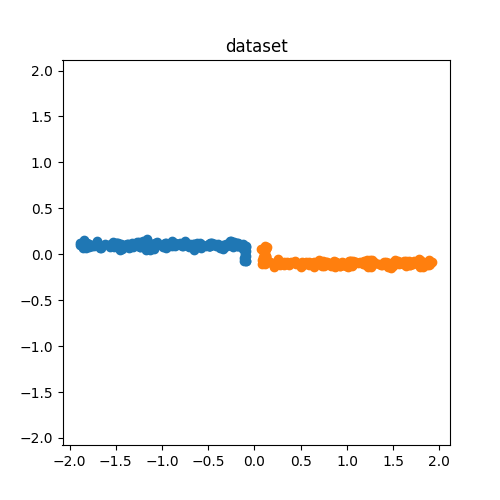

In [16]:
plt.figure(figsize=(5, 5))

plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1])

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

fmin = min(xmin, ymin)
fmax = max(xmax, ymax)

plt.xlim(fmin, fmax)
plt.ylim(fmin, fmax)

plt.title("dataset")

plt.show()

## Compute naive solution
- find the center of mass for both classes
- create the line connecting these centers
- find the line (hyperplane) perpendicular through it

In [17]:
w = m2 - m1
w_perp = np.array([w[1], -w[0]])

c = m1 + 0.5*w

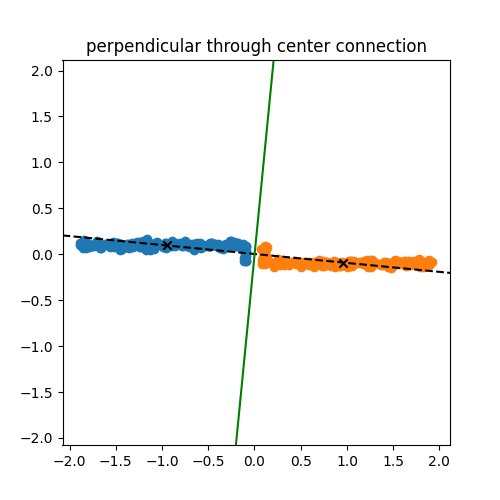

In [18]:
plt.figure(figsize=(5, 5))

plt.scatter(x1[:,0], x1[:,1])
plt.scatter(m1[0], m1[1], color='black', marker='x')
plt.scatter(x2[:,0], x2[:,1])
plt.scatter(m2[0], m2[1], color='black', marker='x')

plt.axline(m1, m2, color='black', linestyle='--')
plt.axline(c, c + 0.01*w_perp, color='green')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

fmin = min(xmin, ymin)
fmax = max(xmax, ymax)

plt.xlim(fmin, fmax)
plt.ylim(fmin, fmax)

plt.title("perpendicular through center connection")

plt.show()

This naive approach discriminates both classes perfectly. 

## Compute the LDA solution
- decorrelate the combined data (under the assumption that both are gaussian)
- find center of mass of decorrelated classes
- create the line connecting these centers
- find the line (hyperplane) perpendicular through it

In [19]:
x = np.concatenate([x1, x2], axis=0)
mean = x.mean(0)
cov = np.cov(x.T)

x_de = (x - mean) @ scipy.linalg.sqrtm(scipy.linalg.solve(cov, np.eye(2)))
mean1_de = x_de[:N].mean(0)
mean2_de = x_de[N:].mean(0)

In [20]:
w_lda = mean2_de - mean1_de
w_lda_perp = np.array([w_lda[1], -w_lda[0]])

center_lda = mean1_de + 0.5 * w_lda

Y_lda = x_de @ w_lda.T

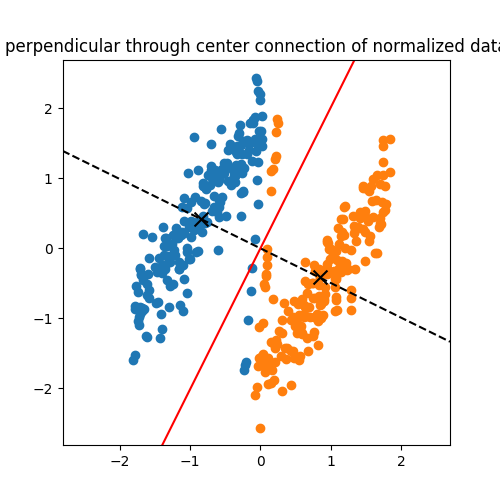

In [21]:
plt.figure(figsize=(5, 5))

plt.scatter(x_de[:N, 0], x_de[:N, 1])
plt.scatter(mean1_de[0], mean1_de[1], c='black', s=100, marker='x')
plt.scatter(x_de[N:, 0], x_de[N:, 1])
plt.scatter(mean2_de[0], mean2_de[1], c='black', s=100, marker='x')
#plt.scatter(0, 0, c='black', s=200, marker='x')

plt.axline(mean1_de, mean2_de, color='black', linestyle='--')
plt.axline(center_lda, center_lda + 0.01*w_lda_perp, color='red')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

fmin = min(xmin, ymin)
fmax = max(xmax, ymax)

plt.xlim(fmin, fmax)
plt.ylim(fmin, fmax)

plt.title("perpendicular through center connection of normalized data")

plt.show()

Although it is not entirely bad, i.e. this solution discriminates the main part of both distributions, it fails to discriminate properly the tails of the distributions. This can be attributed to the gaussian assumptions where these kind of tails do not appear.

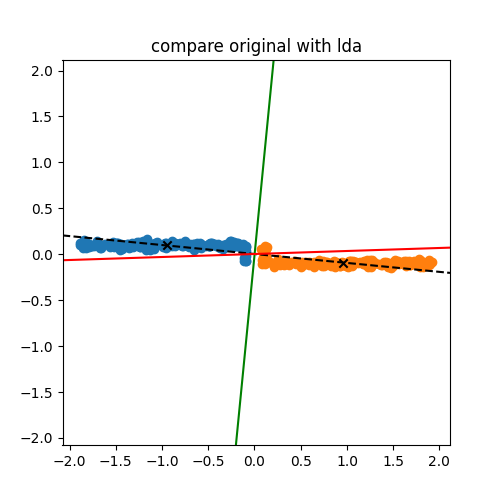

In [22]:
plt.figure(figsize=(5, 5))

plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(m1[0], m1[1], color='black', marker='x')
plt.scatter(x2[:, 0], x2[:, 1])
plt.scatter(m2[0], m2[1], color='black', marker='x')

plt.axline(m1, m2, color='black', linestyle='--')
plt.axline(c, c + 0.01*w_perp, color='green')
plt.axline(c, c + 0.1 * w_perp @ cov, color='red')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

fmin = min(xmin, ymin)
fmax = max(xmax, ymax)

plt.xlim(fmin, fmax)
plt.ylim(fmin, fmax)

plt.title("compare original with lda")

plt.show()

Clearly, the naive approach outperforms LDA in discriminating both classes. The gaussian assumption is missleading LDA here.

## Conclusion
- in gaussian scenarios LDA is a good method to linearly discriminate independent classes
- in that case it outperforms the naive approach
- it is important to remember these assumptions, because without them, the method can be worse than the naive approach